In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.ndimage.filters import gaussian_filter

In [3]:
figsize(8, 6)

In [4]:
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
hplanck=6.626068e-34 #MKS
TCMB = 2.72548 #Kelvin
d2r = np.pi / 180.

In [5]:
z = np.load('../externaldata/cgps.npz')
dlons = z['lons']
dlats = z['lats']
dsig = z['signal']

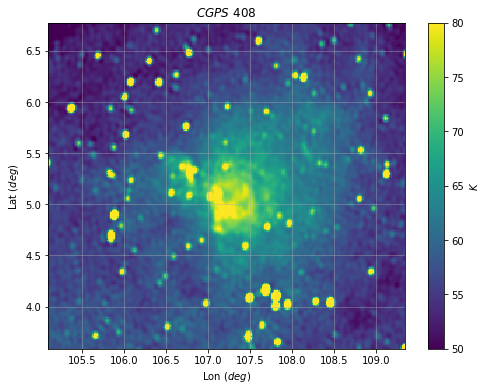

In [6]:
pcolormesh(dlons, dlats, dsig)
clim(50, 80)
cm = colorbar();
xlabel('$\mathrm{Lon}\ (deg)$')
ylabel('$\mathrm{Lat}\ (deg)$')
cm.set_label('$K$')
title('$CGPS\ 408~MHz$')
grid(alpha=0.5)

In [7]:
data = dsig.flatten()

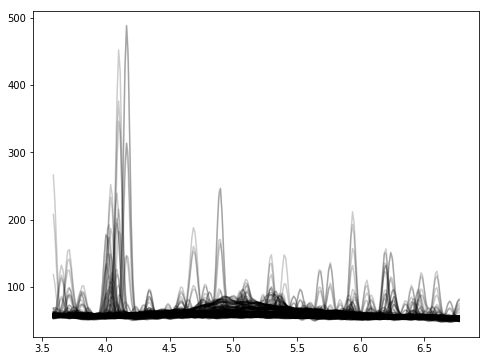

In [9]:
plot(dlats, dsig, color='k', alpha=0.2);

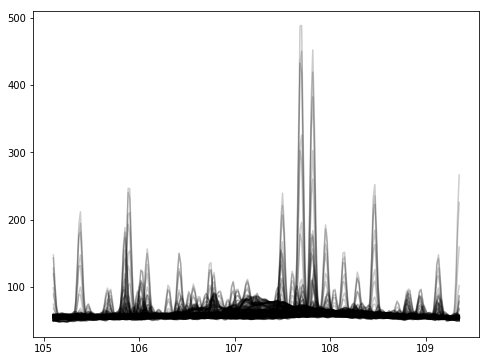

In [10]:
plot(dlons, dsig.T, color='k', alpha=0.2);

In [11]:
lonsq = (dlons - lonc)**2
latsq = (dlats - latc)**2

In [12]:
biglon = np.ones((256, 256)) * lonsq

In [13]:
biglat = np.transpose(np.ones((256, 256)) * latsq)

In [14]:
radius = np.sqrt(biglon + biglat).flatten()

In [15]:
area = (((dlons.max() - dlons.min())/256)**2 + ((dlats.max() - dlats.min())/256)**2) * d2r * d2r

In [16]:
4. /256 * 60

0.9375

In [17]:
nu = 408.e6

In [18]:
datajy = gaussian_filter(dsig, 60.).flatten() * 2. * kboltz * (nu / clight)**2 * area * 1.e26

In [19]:
rmask = radius <= 1.
rdata = datajy[rmask]
annulus = (radius > 4./3.) * (radius < 2.)
adata = datajy[annulus]
print np.sum(rdata - np.median(adata)), np.std(adata) * np.sqrt(len(rdata))

21.6178 0.115395392228


In [20]:
datajy =  data * 2. * kboltz * (nu / clight)**2 * area * 1.e26

In [21]:
rmask = radius <= 1.
rdata = datajy[rmask]
annulus = (radius > 4./3.) * (radius < 2.)
adata = datajy[annulus]
print np.sum(rdata - np.median(adata)), np.std(adata) * np.sqrt(len(rdata))

81.2001 0.712004233327


In [22]:
np.median(adata)

0.037737392

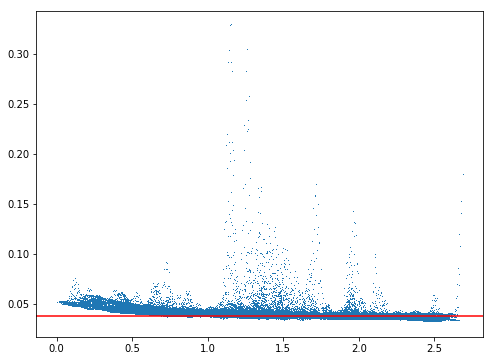

In [23]:
plot(radius, datajy, ',')
axhline(np.median(adata), c='r')

In [24]:
datatup = zip(radius, datajy-np.median(adata))

In [25]:
datatup.sort()

In [26]:
x, y = zip(*datatup)

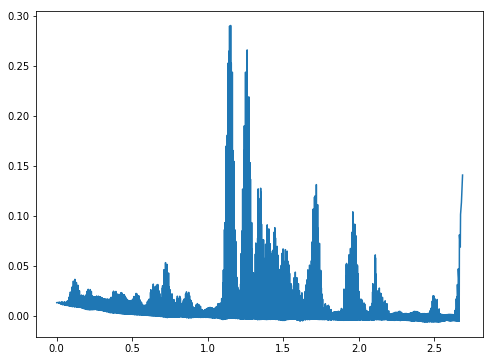

In [27]:
plot(x, y)

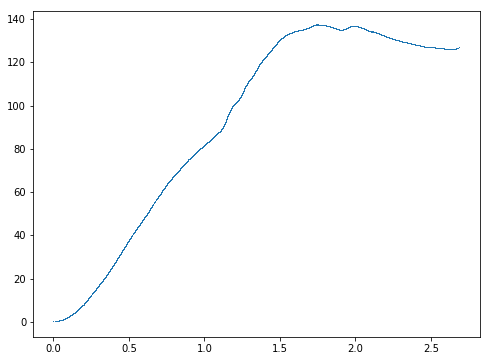

In [28]:
plot(x, np.cumsum(y), ',')

In [29]:
annulus = (radius > 4./3.) * (radius < 2.)
dsigmask = np.copy(data)
dsigmask[~annulus] = np.nan
dsigmask = dsigmask.reshape((256, 256))

/usr/lib64/python2.7/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


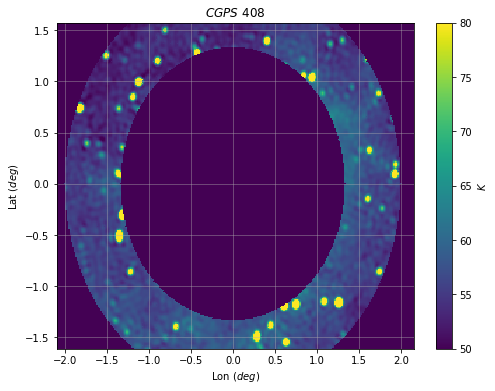

In [30]:
pcolormesh(dlons-lonc, dlats-latc, dsigmask)
clim(50, 80)
cm = colorbar();
xlabel('$\mathrm{Lon}\ (deg)$')
ylabel('$\mathrm{Lat}\ (deg)$')
cm.set_label('$K$')
title('$CGPS\ 408~MHz$')
grid(alpha=0.5)